In [78]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
from matplotlib.ticker import PercentFormatter

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [58]:
country = 'Canada'
title = 'Data Analyst'
df_CA = df[(df['job_country'] == country) & (df['job_title_short'] == title)].copy()
df_CA['Month_no'] = df_CA['job_posted_date'].dt.month
df_CA_exploded = df_CA.explode('job_skills')
df_CA_pivot = df_CA_exploded.pivot_table(index = 'Month_no', columns= 'job_skills', aggfunc = 'size', fill_value = 0 )
df_CA_pivot.loc['Total'] = df_CA_pivot.sum()
df_CA_pivot = df_CA_pivot[df_CA_pivot.loc['Total'].sort_values(ascending=False).index]
df_CA_pivot = df_CA_pivot.drop('Total')
Month_totals = df_CA.groupby('Month_no').size()
df_CA_plot = df_CA_pivot.div(Month_totals/100, axis= 0)
df_CA_plot = df_CA_plot.reset_index()
df_CA_plot['Month'] = df_CA_plot['Month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))
df_CA_plot.set_index('Month', inplace= True)
df_CA_plot.drop(columns= 'Month_no', inplace= True)
df_CA_plot =df_CA_plot.iloc[:, :5]
df_CA_plot

job_skills,sql,excel,python,tableau,power bi
Month,,,,,
Jan,50.000000,36.713287,32.167832,21.678322,19.230769
Feb,52.702703,33.108108,27.027027,14.189189,18.243243
Mar,50.967742,31.612903,28.387097,23.870968,14.838710
Apr,57.541899,26.815642,31.284916,22.905028,20.111732
May,56.875000,41.250000,34.375000,30.625000,20.000000
Jun,49.180328,38.797814,27.322404,25.136612,18.032787
Jul,50.000000,36.057692,28.846154,26.442308,24.038462
Aug,54.644809,26.229508,34.972678,32.240437,24.590164
Sep,60.287081,34.449761,38.277512,30.143541,25.837321


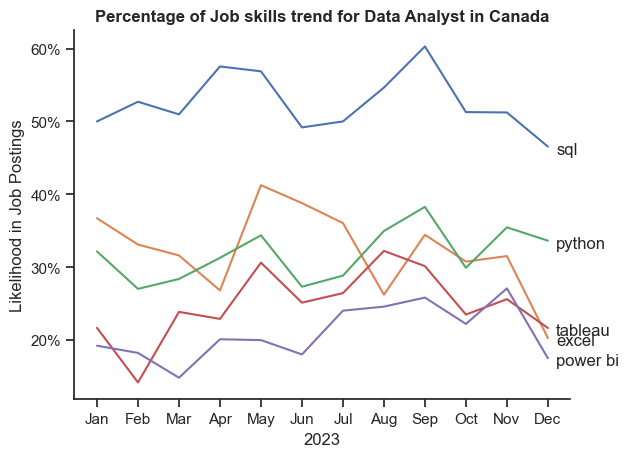

In [83]:
sns.lineplot(df_CA_plot, legend= False, dashes= False)
sns.set_theme(style= 'ticks')
sns.despine()
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.title('Percentage of Job skills trend for Data Analyst in Canada', fontweight = 'bold')

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, y =  df_CA_plot.iloc[-1, i] - 1, s= df_CA_pivot.columns[i])


In [64]:
df_CA_plot



job_skills,sql,excel,python,tableau,power bi
Month,,,,,
Jan,50.000000,36.713287,32.167832,21.678322,19.230769
Feb,52.702703,33.108108,27.027027,14.189189,18.243243
Mar,50.967742,31.612903,28.387097,23.870968,14.838710
Apr,57.541899,26.815642,31.284916,22.905028,20.111732
May,56.875000,41.250000,34.375000,30.625000,20.000000
Jun,49.180328,38.797814,27.322404,25.136612,18.032787
Jul,50.000000,36.057692,28.846154,26.442308,24.038462
Aug,54.644809,26.229508,34.972678,32.240437,24.590164
Sep,60.287081,34.449761,38.277512,30.143541,25.837321
